In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
exp_name = 'exp_4'

In [59]:
df1 = pd.read_csv('results/{0}/control_val_results.csv'.format(exp_name))
df1

,date,eps,iter,use_top_k,threshold,tn,fp,fn,tp,acc
0,1.590506e+09,0,0,0,-16.801611,834,6,24,816,0.982143


In [60]:
df2 = pd.read_csv('results/{0}/utility_classifier_val_results.csv'.format(exp_name))
df2

,date,eps,iter,use_top_k,threshold,tn,fp,fn,tp,acc
0,1.590529e+09,20,0,0,-6.405039,840,0,643,197,0.617262
1,1.590529e+09,30,0,0,-5.631933,840,0,328,512,0.804762
2,1.590530e+09,40,0,0,-5.211169,840,0,282,558,0.832143
3,1.590530e+09,50,0,0,-5.020634,839,1,278,562,0.833929
4,1.590531e+09,100,0,0,-3.834298,838,2,308,532,0.815476


In [61]:
df3 = pd.read_csv('results/{0}/control_test_results.csv'.format(exp_name))
df3

,date,eps,iter,use_top_k,threshold,tn,fp,fn,tp,acc
0,1.590506e+09,0,0,0,-16.801611,1185,15,24,1176,0.98375


In [62]:
df23 = pd.read_csv('results/{0}/utility_classifier_test_results.csv'.format(exp_name))
df23

,date,eps,iter,use_top_k,threshold,tn,fp,fn,tp,acc
0,1.590529e+09,20,0,0,-6.405039,1200,0,896,304,0.626667
1,1.590529e+09,30,0,0,-5.631933,1198,2,469,731,0.803750
2,1.590530e+09,40,0,0,-5.211169,1200,0,373,827,0.844583
3,1.590530e+09,50,0,0,-5.020634,1197,3,367,833,0.845833
4,1.590531e+09,100,0,0,-3.834298,1195,5,431,769,0.818333


In [63]:
df4 = pd.read_csv('results/{0}/utility_classifier_test_results.csv'.format(exp_name))
df_acc = df4[['eps', 'acc']]
df_acc

,eps,acc
0,20,0.626667
1,30,0.803750
2,40,0.844583
3,50,0.845833
4,100,0.818333


In [64]:
df5 = pd.read_csv('results/{0}/utility_similarity_test_results.csv'.format(exp_name))
df_hamming = df5[df5['metric'] == 'hamming']
df_hamming_metric = df_hamming[['eps', 'mean_all']]
df_hamming_metric
df_hamming

,date,eps,iter,metric,mean_normal,mean_abnormal,mean_all
0,1.590532e+09,20,0,hamming,0.306318,0.405895,0.356107
3,1.590532e+09,30,0,hamming,0.271573,0.372823,0.322198
6,1.590532e+09,40,0,hamming,0.266746,0.358911,0.312829
9,1.590532e+09,50,0,hamming,0.263554,0.355937,0.309746
12,1.590532e+09,100,0,hamming,0.265839,0.352291,0.309065


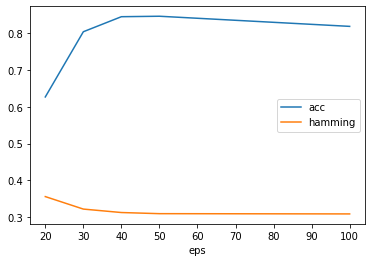

In [70]:
plt.plot(df_acc['eps'], df_acc['acc'])
plt.plot(df_hamming_metric['eps'], df_hamming_metric['mean_all'])
plt.xlabel("eps")
plt.legend(['acc', 'hamming'])
plt.show()

In [71]:
df6 = pd.read_csv('results/{0}/utility_similarity_test_results.csv'.format(exp_name))
df_metric = df6[df6['metric'] == 'cosine']
df_metric_c = df_metric[['eps', 'mean_all']]
df_metric_c

,eps,mean_all
2,20,0.090791
5,30,0.083587
8,40,0.081011
11,50,0.080208
14,100,0.079360


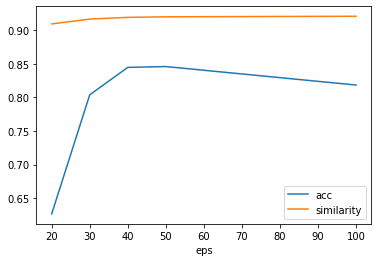

In [72]:
plt.plot(df_acc['eps'], df_acc['acc'])
plt.plot(df_metric_c['eps'], 1 - df_metric_c['mean_all'])
plt.xlabel("eps")
plt.legend(['acc', 'similarity'])
plt.show()